# Python essentials

## Objectives:

* Import packages/libraries

* Review basic data types
    * string (str): text characters
    * integer (int): whole number
    * floating point number (float): number with a decimal

* New data types:
    * list
    * dictionary
    * dataframe

* Run and define functions
    * `print()`
    * `type()`
    * `Chem.MolFromSmiles()`
    * `Chem.Draw.MolToImage()`
    * `Descriptors.ExactMolWt()`
    
* RDKit library
* Pandas library


In [82]:
import rdkit
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

In [46]:
ibuprofen = 'CC(Cc1ccc(cc1)C(C(=O)O)C)C'

In [47]:
print(ibuprofen)
type(ibuprofen)

CC(Cc1ccc(cc1)C(C(=O)O)C)C


str

In [48]:
mol = Chem.MolFromSmiles(ibuprofen)

In [52]:
print(mol)
type(mol)

rdkit.Chem.rdchem.Mol

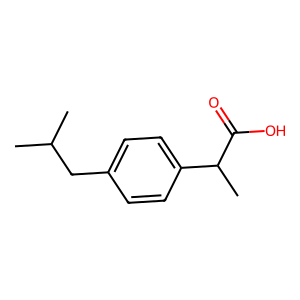

In [49]:
image = Chem.Draw.MolToImage(mol)
image

In [53]:
print(image)
type(image)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x7FCB77DCD010>


PIL.PngImagePlugin.PngImageFile

In [71]:
num_atoms = rdMolDescriptors.CalcNumAtoms(mol)

In [72]:
print(num_atoms)
type(num_atoms)

33


int

In [66]:
mw = rdMolDescriptors.CalcExactMolWt(mol)

In [67]:
print(mw)
type(mw)

206.130679816


float

In [68]:
ibprofen_properties = {}

In [69]:
ibprofen_properties['num_atoms'] = num_atoms
ibprofen_properties['mw'] = mw

In [70]:
print(ibprofen_properties)
type(ibprofen_properties)

{'num_atoms': 15, 'mw': 206.130679816}


dict



`rdkit.Chem.rdMolDescriptors.CalcExactMolWt((Mol)mol[, (bool)onlyHeavy=False]) → float :`

returns the molecule’s exact molecular weight

`rdkit.Chem.rdMolDescriptors.CalcNumAtoms((Mol)mol) → int :`

returns the total number of atoms for a molecule

`rdkit.Chem.rdMolDescriptors.CalcFractionCSP3((Mol)mol) → float :`

returns the fraction of C atoms that are SP3 hybridized

`rdkit.Chem.rdMolDescriptors.CalcMolFormula((Mol)mol) → str :`

returns the molecule’s formula

`rdkit.Chem.rdMolDescriptors.CalcNumAliphaticCarbocycles((Mol)mol) → int :`

returns the number of aliphatic (containing at least one non-aromatic bond) carbocycles for a molecule

`rdkit.Chem.rdMolDescriptors.CalcNumAliphaticHeterocycles((Mol)mol) → int :`

returns the number of aliphatic (containing at least one non-aromatic bond) heterocycles for a molecule

`rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings((Mol)mol) → int :`

returns the number of aromatic rings for a molecule

`rdkit.Chem.rdMolDescriptors.CalcNumAtomStereoCenters((Mol)mol) → int :`

Returns the total number of atomic stereocenters (specified and unspecified)

`rdkit.Chem.rdMolDescriptors.CalcNumHBA((Mol)mol) → int :`

returns the number of H-bond acceptors for a molecule

`rdkit.Chem.rdMolDescriptors.CalcNumHBD((Mol)mol) → int :`

returns the number of H-bond donors for a molecule

In [81]:
print(rdMolDescriptors.CalcMolFormula(mol))

C13H18O2


In [76]:
print(rdMolDescriptors.CalcNumAliphaticCarbocycles(mol))

0


In [83]:
def get_properties(mol : rdkit.Chem.rdchem.Mol, properties : dict):
    properties['mw'] = rdMolDescriptors.CalcExactMolWt(mol)
    properties['formula'] = rdMolDescriptors.CalcMolFormula(mol)
    properties['num_atoms'] = rdMolDescriptors.CalcNumAtoms(mol)
    
    return properties

Working remaining:

* prompt student to write a simple function to calculate 2 properties for a molecule
* store rdkit data to a dictionary
* index a dictionary
* Dict -> dataframe
